In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. 데이터 로드 및 확인

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2) # num_words를 5000, 10000, 15000으로 변경해가며 실험
# x : 뉴스 데이터 / y : 레이블(클래스)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


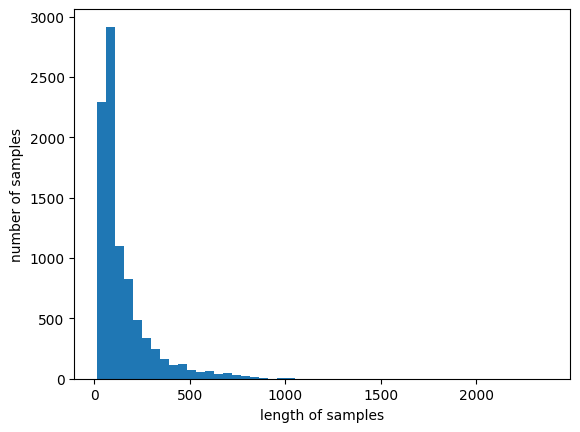

In [7]:
# 데이터 분포 확인
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

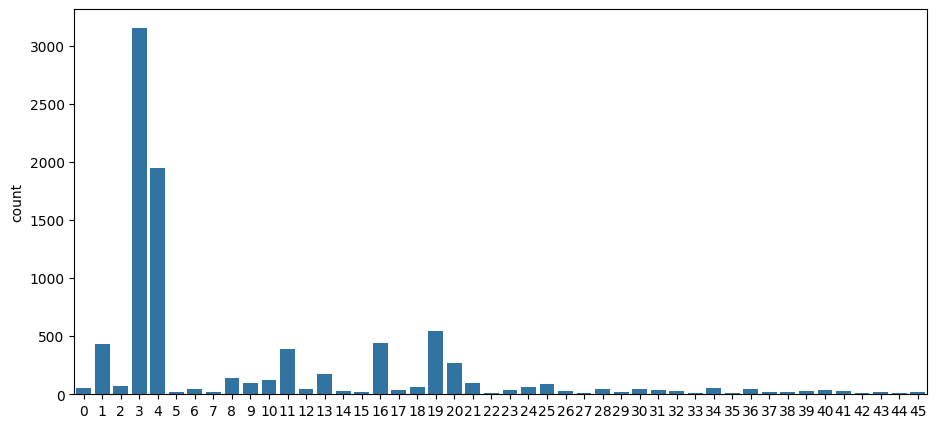

In [8]:
# 클래스 분포 확인
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


# 2. 원본 데이터 복원

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
=3


In [11]:
word_index['the']

1

In [12]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [13]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [14]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [15]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [16]:
decoded_train = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded_train.append(t)
x_train = decoded_train

decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)
x_test = decoded_test

In [17]:
print(x_train[:5])
print(x_test[:5])

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3', '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3', '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one

# 3. 벡터

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [19]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [20]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


# 4. 나이브 베이즈 분류기

In [21]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [22]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [23]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [24]:
print(x_test[3])
print(y_test[3])

<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3
4


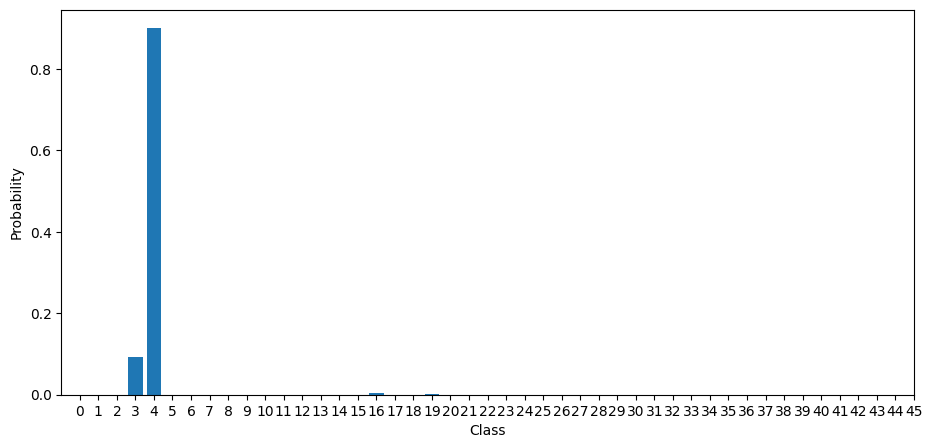

In [25]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [26]:
model.predict(tfidfv_test[3])

array([4])

# 5. F1-Score

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

# 6. 다양한 ML 모델

In [31]:
# CNB
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [32]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [33]:
# LR
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [34]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8085485307212823


In [35]:
# SVM
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [36]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7916295636687445


In [37]:
# DT
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [38]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


In [39]:
# Random Forest
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [40]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


In [41]:
# Gradient Boosting Classifier
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [42]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7684772929652716


In [43]:
# Voting
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(penalty='l2', max_iter=1000)),
        ('nb', ComplementNB()),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'
)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', ComplementNB()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [44]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7978628673196795


# 7. 딥러닝 모델

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 200  # 문장 길이 제한

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [4]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_train.shape[1]  # 총 46개 클래스


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.2)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.3505 - loss: 2.8412 - val_accuracy: 0.4841 - val_loss: 2.0232
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4887 - loss: 1.9625 - val_accuracy: 0.5103 - val_loss: 1.7941
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5259 - loss: 1.8101 - val_accuracy: 0.5448 - val_loss: 1.7903
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5320 - loss: 1.7551 - val_accuracy: 0.5320 - val_loss: 1.7291
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5728 - loss: 1.6283 - val_accuracy: 0.5409 - val_loss: 1.7544
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5935 - loss: 1.5628 - val_accuracy: 0.6233 - val_loss: 1.4908
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6535 - loss: 1.3514 - val_accuracy: 0.6411 - val_loss: 1.4649
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6998 - loss: 1.1596 - val_acc

In [7]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6754 - loss: 1.3740
Test Accuracy: 0.6665


# 팀원들과 함께 분기 실험 진행한 결과

| **모델**                       | **5000 Acc / F1**   | **10000 Acc / F1**  | **15000 Acc / F1**  |
| ---------------------------- | ------------------- | ------------------- | ------------------- |
| **전통 ML 단일 모델**              |                     |                     |                     |
| Decision Tree (dtree)        | 0.618 / 0.573       | 0.6202 / 0.5776     | 0.6193 / 0.5756     |
| Naive Bayes                  | 0.6732 / 0.6013     | 0.6589 / 0.5782     | 0.6371 / 0.5536     |
| Complement Naive Bayes       | 0.7707 / 0.7459     | 0.7707 / 0.7457     | 0.772 / 0.7448      |
| SVM                          | 0.7752 / 0.7721     | 0.7881 / 0.7844     | 0.7885 / 0.7837     |
| Random Forest                | 0.70 / 0.68         | 0.67 / 0.64         | 0.67 / 0.64         |
| Gradient Boosting            | 0.7676 / 0.7662     | 0.7663 / 0.7622     | 0.7707 / 0.7680     |
| Logistic Regression (L2)     | 0.80 / 0.80         | 0.81 / 0.81         | 0.81 / 0.81         |
| **ML 앙상블 (Ensemble Voting)** |                     |                     |                     |
| NB + LR + RF (soft)          | 0.7560 / 0.7222     | 0.7369 / 0.6962     | 0.7222 / 0.6781     |
| NB + SVM + RF (hard)         | 0.7752 / 0.7510     | 0.7582 / 0.7310     | 0.7507 / 0.7229     |
| CNB + SVM + RF (hard)        | 0.7979 / 0.7794     | 0.8010 / 0.7828     | 0.7983 / 0.7809     |
| LR + SVM + GBT (hard)        | **0.8215 / 0.8100** | **0.8179 / 0.8075** | **0.8197 / 0.8088** |
| **딥러닝 모델**                   |                     |                     |                     |
| LSTM                         | 0.6109 / 0.5635     | 0.64 / 0.62         | -                   |
| Bi-LSTM                      | 0.5850 / 0.5317     | -                   | -                   |
| CNN                          | 0.7912 / 0.7736     | -                   | -                   |


- 단일 모델로 봤을 때 SVM과 LR이 가장 높은 성능을 보임
- 그래서인지 복합 모델 또한 SVM과 LR이 포함된 보팅 모델이 가장 높은 성능을 보임


---


- 단일 모델만 봤을 때에는 vocab_size가 5000일 때 가장 높은 성능을 보임
- 하지만 전체적으로는 vocab_size가 10000일 때 평균적으로 좋은 성능을 보임


---

- 전반적으로 DL모델에 비해 ML모델이 더 높은 성능을 보임 (데이터 수가 적어서 그런 것으로 추정)

- 다른 조에서 실행 시간을 비교한 것이 인상깊었음. 확실히 실제로 사용하기엔 이 또한 중요한 평가점일 것 같음
- 또한 다른 조에서 vocab_size에 제한을 두지 않고 실험을 해보기도 했는데 이 때 가장 높은 성능을 보인 모델도 있었음.